In [1]:
%load_ext autoreload
%autoreload 2
import sys
# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
from src import most_recent_mesonet_data
from src import most_recent_mesonet_time
from src import landtype_describe
from src.plotting_scripts import landtype
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import pandas as pd
import numpy as np 
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
import statistics
from statistics import mode
import cartopy.crs as crs
import cartopy.feature as cfeature

Matplotlib created a temporary config/cache directory at /tmp/tmp.MLqVJdoXfk/matplotlib-xxsxrqja because the default path (/home/aevans/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
def plurality_plot(df):
                # show aspect slope legend
        img = mpimg.imread('/home/aevans/landtype/notebooks/GUID-92475682-AC35-4C9A-8150-BE7656D56B35-web.png')
        plt.imshow(img)
        plt.show()
# create legend and dictionary for data 
        legend = np.array([19, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48])

        colors = ['grey', 'lime', 'aquamarine', 'lightskyblue', 'mediumorchid', 'lightpink', 'lightcoral', 'bisque', 'lightyellow', 'limegreen', 'turquoise', 'deepskyblue', 'darkorchid', 'palevioletred', 'coral', 'orange', 'gold', 'darkgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', 'crimson', 'firebrick', 'darkorange', 'yellow']

        # dictionary for cardinal directions
        directdict = {21: 'N', 31: 'N', 41: 'N', 
        22: 'NE', 32: 'NE', 42: 'NE', 
        23:  'E', 33:  'E', 43:  'E', 
        24: 'SE', 34: 'SE', 44: 'SE', 
        25: 'S', 35: 'S', 45: 'S', 
        26: 'SW', 36: 'SW', 46: 'SW', 
        27: 'W', 37: 'W', 47: 'W', 
        28: 'NW', 38: 'NW', 48: 'NW',
        19: 'N/A'}

        slopedict = {19: 'N/A', 
        21: 'LOW', 22: 'LOW', 23: 'LOW', 24: 'LOW', 25: 'LOW', 26: 'LOW', 27: 'LOW', 28: 'LOW', 
        31: 'MODERATE', 32: 'MODERATE', 33: 'MODERATE', 34: 'MODERATE', 35: 'MODERATE', 36: 'MODERATE', 37: 'MODERATE', 38: 'MODERATE', 
        41: 'HIGH', 42: 'HIGH', 43: 'HIGH', 44: 'HIGH', 45: 'HIGH', 46: 'HIGH', 47: 'HIGH', 48: 'HIGH'}

                #legend 
        patches = []
        for i,_ in enumerate(colors):
                patch = mpatches.Patch(color=colors[i], label=legend[i])
                patches.append(patch)


        projPC = crs.PlateCarree()
        latN = df['lat'].max()+1
        latS = df['lat'].min()-1
        lonW = df['lon'].max()+1
        lonE = df['lon'].min()-1
        cLat = (latN + latS) / 2
        cLon = (lonW + lonE) / 2
        projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

        fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection': crs.PlateCarree()})
        ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle='--');
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.add_feature(cfeature.STATES)
        ax.xticklabels_top = False
        ax.ylabels_right = False
        ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                        linewidth=2, color='black', alpha=0.5, linestyle='--')
        ax.scatter(x=df['lon'],
                                        y=df['lat'],
                                        c=df['color'],
                                        s=40,
                                        marker = 'o',
                                        transform=crs.PlateCarree()
                                        )
        ax.set_title('Mesonet Site Slope', size=16)
        ax.set_xlabel('Longitude',size=14)
        ax.set_ylabel('Latitude',size=14)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.grid()
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

def percent_plot(df):
# create legend and dictionary for data 
        legend = np.array([19, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48])

        colors = ['grey', 'lime', 'aquamarine', 'lightskyblue', 'mediumorchid', 'lightpink', 'lightcoral', 'bisque', 'lightyellow', 'limegreen', 'turquoise', 'deepskyblue', 'darkorchid', 'palevioletred', 'coral', 'orange', 'gold', 'darkgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', 'crimson', 'firebrick', 'darkorange', 'yellow']

                #legend 
        patches = []
        for i,_ in enumerate(colors):
                patch = mpatches.Patch(color=colors[i], label=legend[i])
                patches.append(patch)

        fig, ax = plt.subplots(figsize=(20,10))
        ax.scatter(df['Station'], df['Divide'], c=df['color'], s=50)
        for n in df.iterrows():
                ax.annotate(n[1]['Station'], (n[1]['Station'], n[1]['Divide']), fontsize=15)
        ax.grid()
        ax.set_ylabel('Percent of Total', size=20)
        ax.tick_params(labelbottom = False, bottom = False)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='center left', borderaxespad=0,handles=patches)

In [4]:
# This will return the most recent data avail on mesonet 
# this is my file path
ny_mesonet_data_path = '/home/aevans/nysm/archive/nysm/netcdf/proc'
ok_mesonet_data_path = '/home/aevans/landtype/geoinfo.csv'

In [5]:
# create a dataframe of mesonet data ny
ny_df = most_recent_mesonet_data.current_time_mesonet_df(ny_mesonet_data_path)
ny_df = most_recent_mesonet_time.most_recent_time(ny_df, ny_mesonet_data_path)

In [6]:
# create a dataframe of mesonet data ok
ok_df = pd.read_csv(ok_mesonet_data_path)

In [7]:
ny_df_lons = ny_df['lon'].to_list()
ny_df_lats = ny_df['lat'].to_list()
ok_df_lons = ok_df['elon'].to_list()
ok_df_lats = ok_df['nlat'].to_list()

In [8]:
# create legend and dictionary for data 
legend = np.array([19, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48])

colors = ['grey', 'lime', 'aquamarine', 'lightskyblue', 'mediumorchid', 'lightpink', 'lightcoral', 'bisque', 'lightyellow', 'limegreen', 'turquoise', 'deepskyblue', 'darkorchid', 'palevioletred', 'coral', 'orange', 'gold', 'darkgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', 'crimson', 'firebrick', 'darkorange', 'yellow']

directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

slope = ['N/A', 'LOW', 'MODERATE', 'HIGH']

colordict = {}
for x,_ in enumerate(colors):
    colordict.update({legend[x] : colors[x]})

In [9]:
# dictionary for slope values and classes
slopedict = {19: 'N/A', 
21: 'LOW', 22: 'LOW', 23: 'LOW', 24: 'LOW', 25: 'LOW', 26: 'LOW', 27: 'LOW', 28: 'LOW', 
31: 'MODERATE', 32: 'MODERATE', 33: 'MODERATE', 34: 'MODERATE', 35: 'MODERATE', 36: 'MODERATE', 37: 'MODERATE', 38: 'MODERATE', 
41: 'HIGH', 42: 'HIGH', 43: 'HIGH', 44: 'HIGH', 45: 'HIGH', 46: 'HIGH', 47: 'HIGH', 48: 'HIGH'}

# dictionary for cardinal directions
directdict = {21: 'N', 31: 'N', 41: 'N', 
22: 'NE', 32: 'NE', 42: 'NE', 
23:  'E', 33:  'E', 43:  'E', 
24: 'SE', 34: 'SE', 44: 'SE', 
25: 'S', 35: 'S', 45: 'S', 
26: 'SW', 36: 'SW', 46: 'SW', 
27: 'W', 37: 'W', 47: 'W', 
28: 'NW', 38: 'NW', 48: 'NW',
19: 'N/A'}

In [10]:
# paths to data 
path_ny_30 = f'/home/aevans/landtype/elevation/data/CSVs_slope_ny_30km/'
path_ny_50 = f'/home/aevans/landtype/elevation/data/CSVs_slope_ny_50km/'
path_ok_30 = f'/home/aevans/landtype/elevation/data/CSVs_slope_ok_30km/'
path_ok_50 = f'/home/aevans/landtype/elevation/data/CSVs_slope_ok_50km/'

In [11]:
# these are my csvs for the landtype buffers in the nysm 
all_files = os.listdir(path_ny_30)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))

In [12]:
station_list_ny = ny_df['station'].to_list()

In [13]:
station_list_ok = ok_df['stid'].to_list()

In [14]:
path = f'/home/aevans/landtype/elevation/data/OK/slope/30km/'
dirs = os.listdir(path)
sort_dirs = sorted(dirs)

In [15]:
path_ny = f'/home/aevans/landtype/elevation/data/NY/slope/30km/'
dirs_ny = os.listdir(path_ny)
sort_dirs_ny = sorted(dirs_ny)

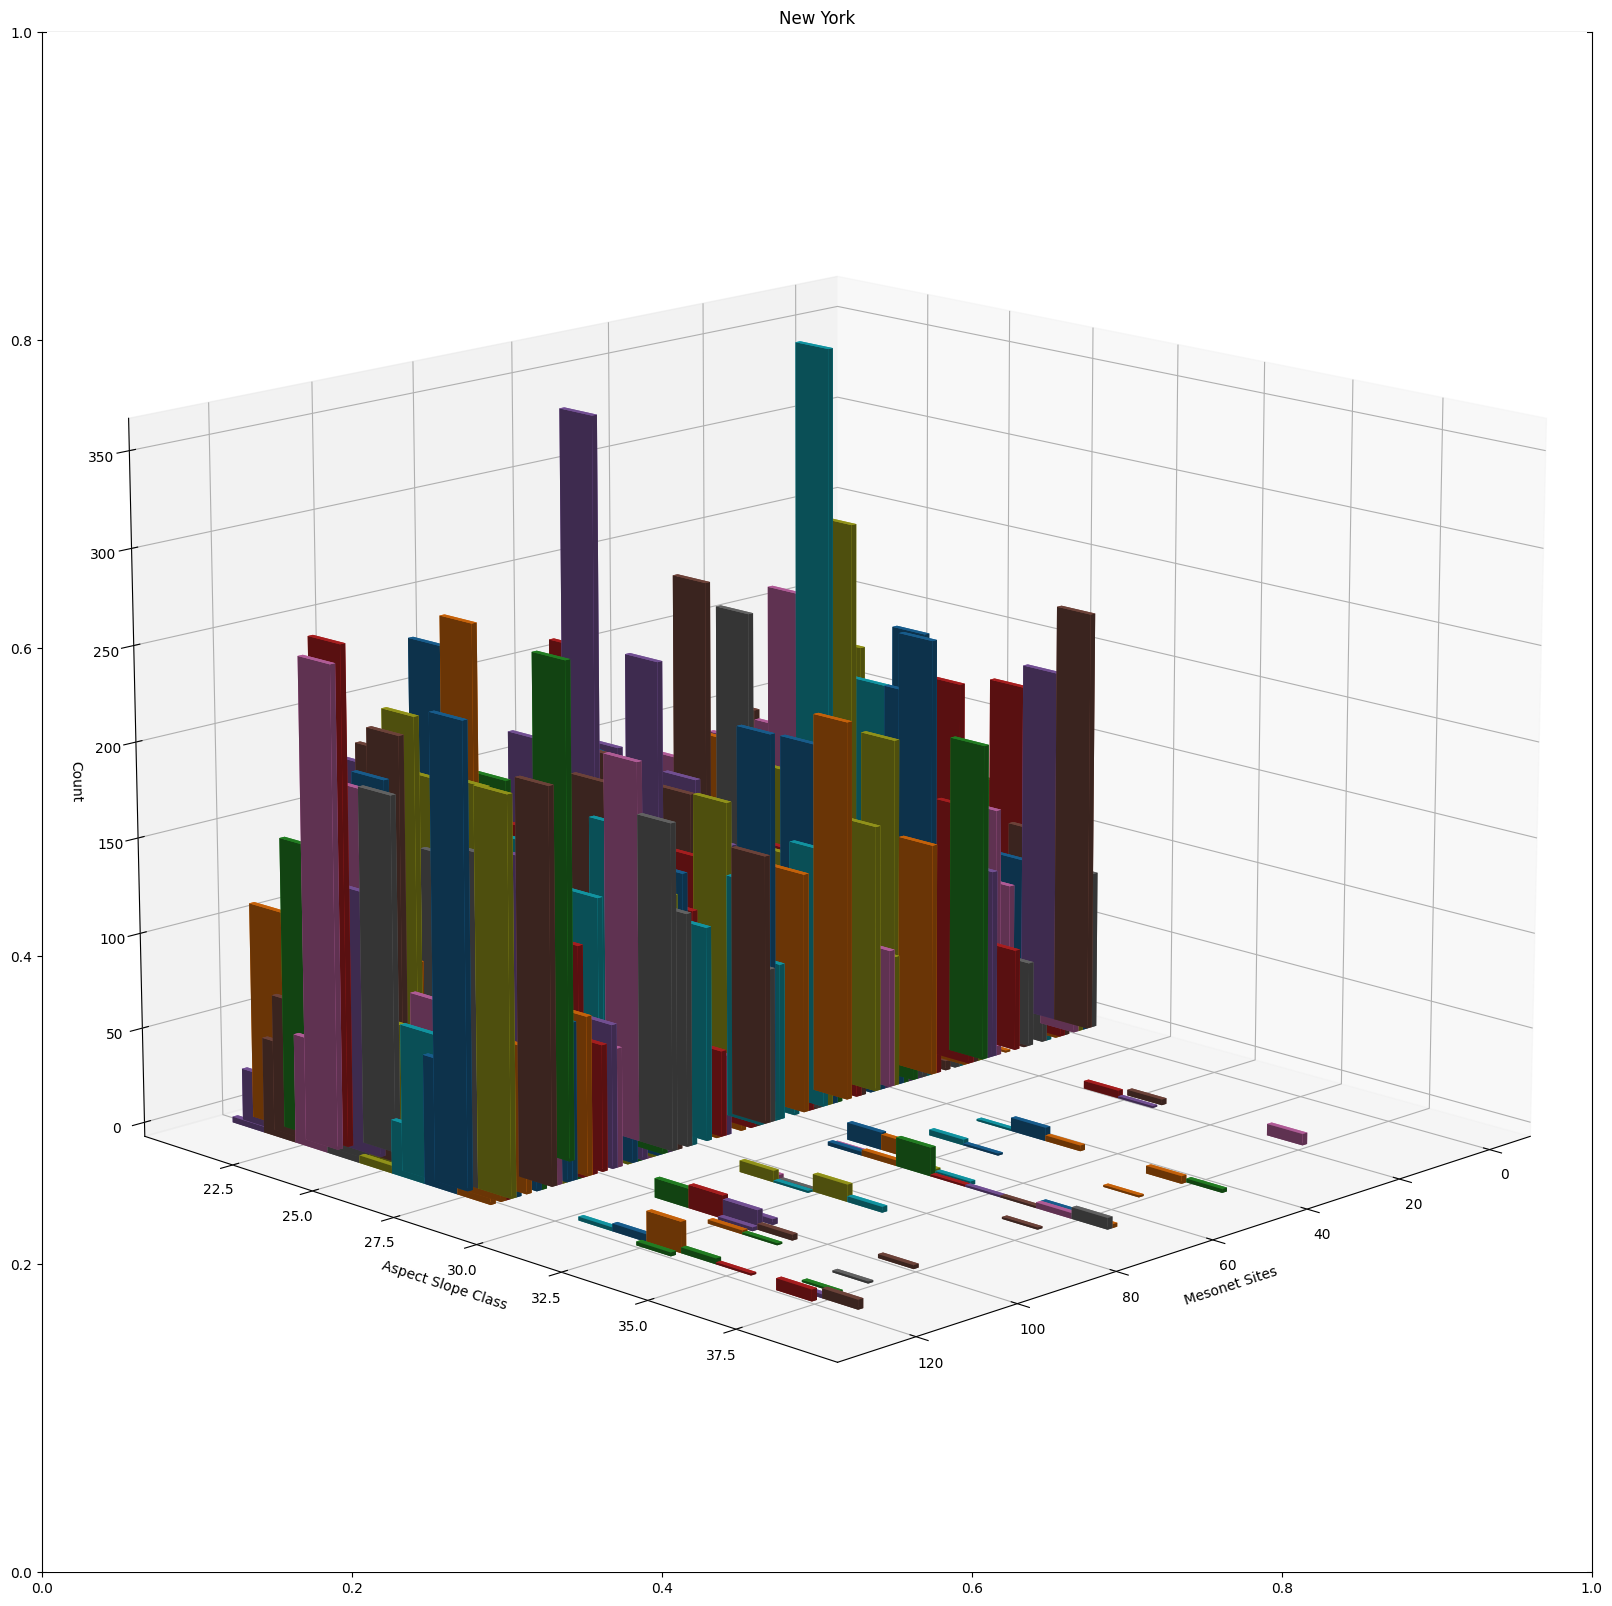

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
ax = fig.add_subplot( projection='3d')
ax.view_init(15, 45)
ax.set_xlabel("Mesonet Sites")
ax.set_ylabel("Aspect Slope Class")
ax.set_zlabel("Count")
ax.set_title('New York')
for i,_ in enumerate(sort_dirs_ny):
    df = pd.read_csv(f'/home/aevans/landtype/elevation/data/NY/slope/30km/{sort_dirs_ny[i]}')
    for x,_ in df.iterrows():
        dfv = df.iloc[x]
        classt = dfv[2]
        count_ = dfv[3]
        if classt != 19:
            top =  count_
            bottom = np.zeros_like(top)
            width = depth = 1
            ax.bar3d(i, classt, bottom, width, depth, top, shade=True)

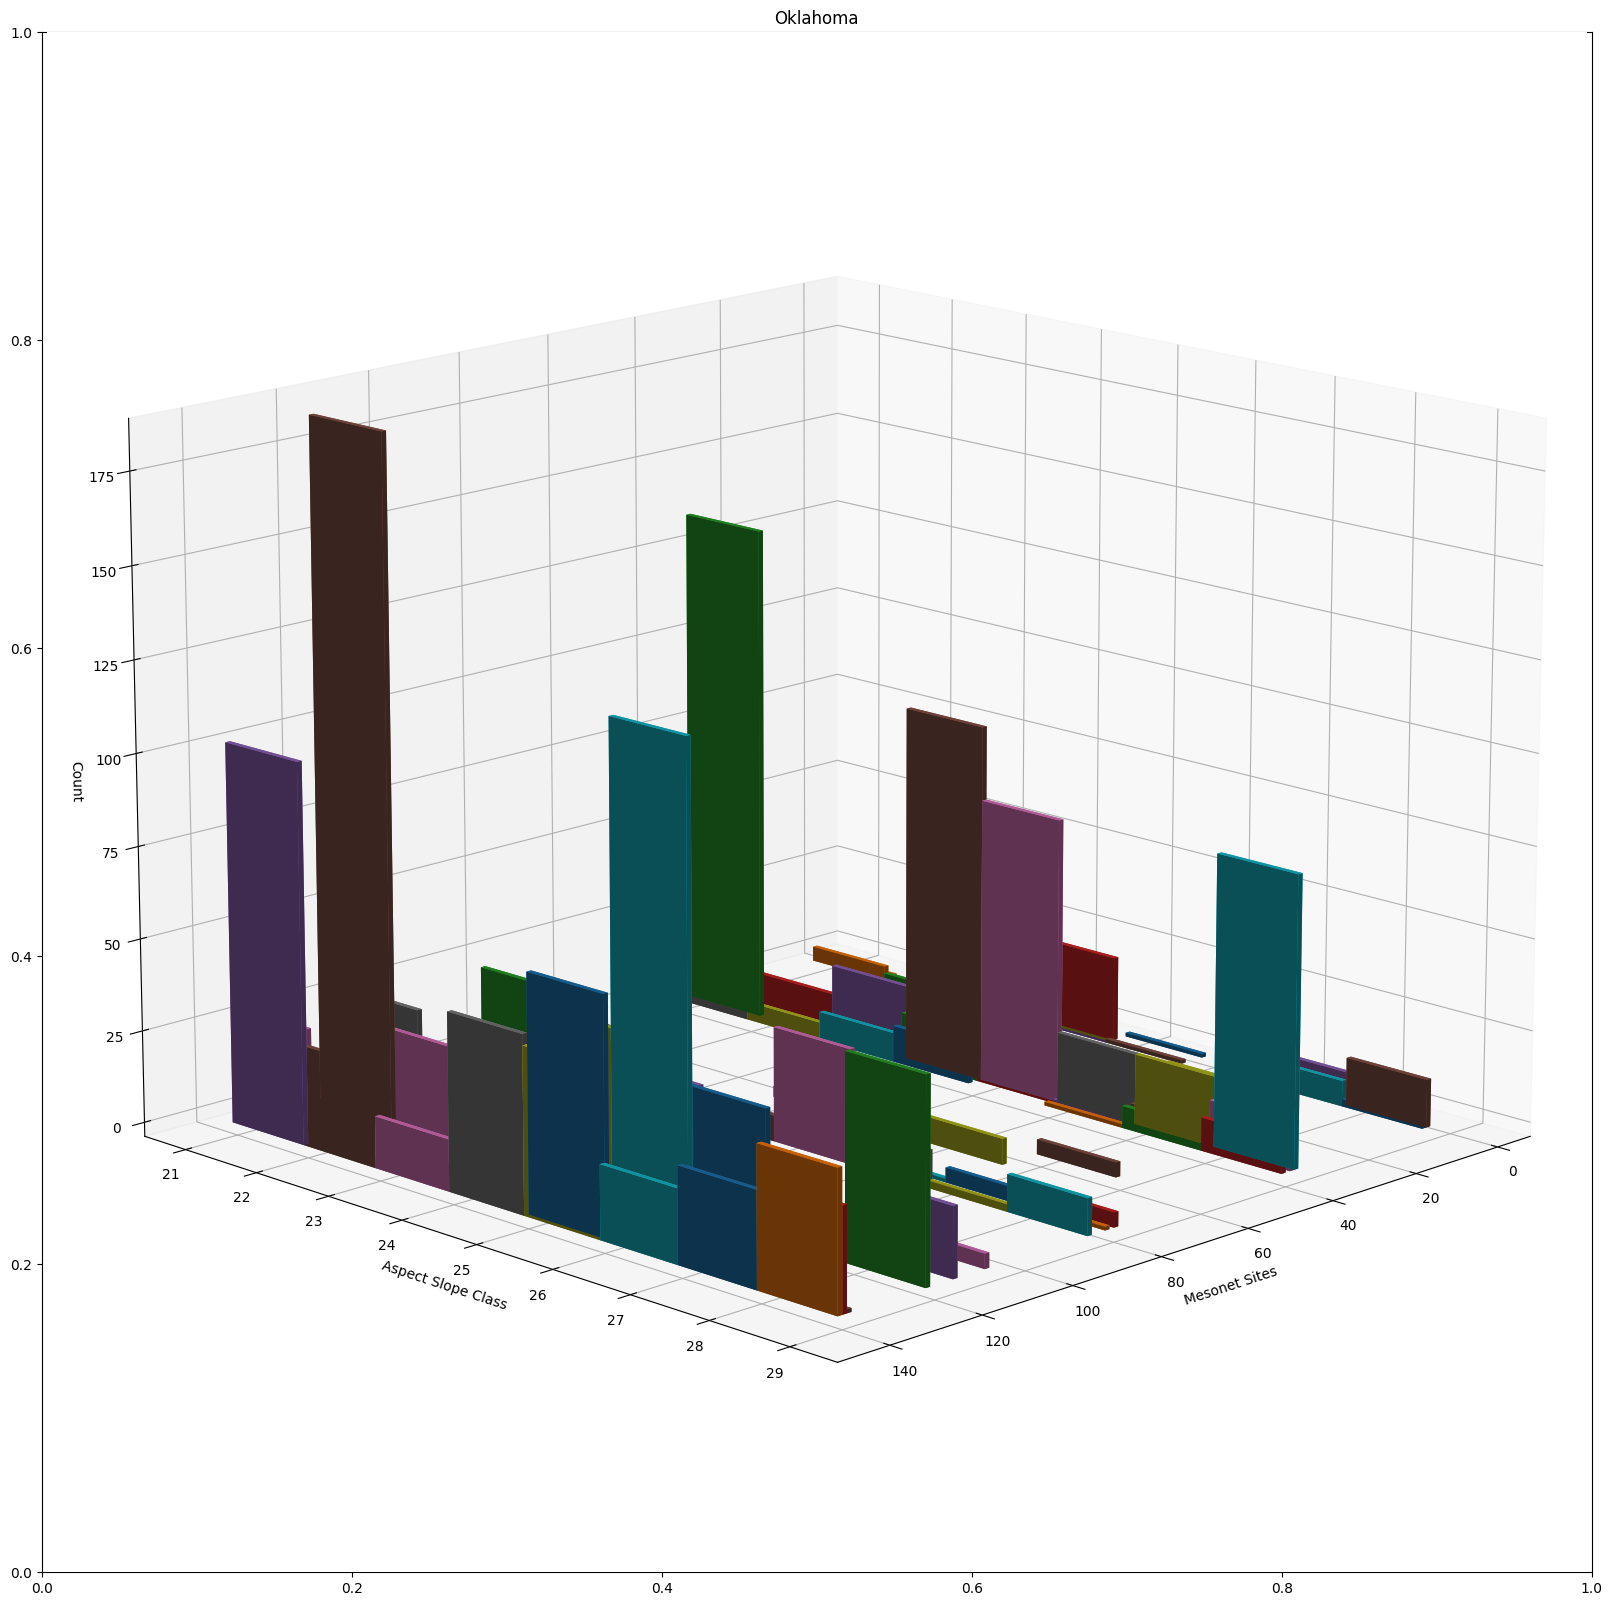

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
ax = fig.add_subplot( projection='3d')
ax.view_init(15, 45)
ax.set_xlabel("Mesonet Sites")
ax.set_ylabel("Aspect Slope Class")
ax.set_zlabel("Count")
ax.set_title('Oklahoma')
for i,_ in enumerate(sort_dirs):
    df = pd.read_csv(f'/home/aevans/landtype/elevation/data/OK/slope/30km/{sort_dirs[i]}')
    for x,_ in df.iterrows():
        dfv = df.iloc[x]
        classt = dfv[2]
        count_ = dfv[3]
        if classt != 19:
            top =  count_
            bottom = np.zeros_like(top)
            width = depth = 1
            ax.bar3d(i, classt, bottom, width, depth, top, shade=True)

In [18]:
# create legend and dictionary for data 
legend = np.array([19, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48])

colors = ['grey', 'lime', 'aquamarine', 'lightskyblue', 'mediumorchid', 'lightpink', 'lightcoral', 'bisque', 'lightyellow', 'limegreen', 'turquoise', 'deepskyblue', 'darkorchid', 'palevioletred', 'coral', 'orange', 'gold', 'darkgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', 'crimson', 'firebrick', 'darkorange', 'yellow']

directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

slope = ['N/A', 'LOW', 'MODERATE', 'HIGH']

            #legend 
patches = []
for i,_ in enumerate(colors):
        patch = mpatches.Patch(color=colors[i], label=legend[i])
        patches.append(patch)

In [19]:
def format_df(df):
    new_df = pd.DataFrame()
    value_list = []
    for x,_ in df.iterrows():
        if df['Value'].iloc[x] != 19:
            count = int(df.iloc[x]['Count'])
            value = df.iloc[x]['Value']
            for n in np.arange(count):
                val = value
                value_list.append(value)
    new_df['Value'] = value_list
    new_df['Direction'] = new_df['Value'].map(directdict)
    new_df['Slope'] = new_df['Value'].map(slopedict)
    return new_df

In [20]:
# x = 0
# for i in range(1,127): 
#     df = pd.read_csv(f'{path_ny_30}/{i}_csv.csv')
#     df['slope'] = df['Value'].map(slopedict)
#     df['direction'] = df['Value'].map(directdict)
#     df.to_csv(f'/home/aevans/landtype/elevation/data/NY/slope/30km/{station_list_ny[x]}_slope_30km.csv')
#     x+= 1


In [21]:
# x = 0
# for i in range(1,127): 
#     df = pd.read_csv(f'{path_ny_30}/{i}_csv.csv')
#     df['slope'] = df['Value'].map(slopedict)
#     df['direction'] = df['Value'].map(directdict)
#     df.to_csv(f'/home/aevans/landtype/elevation/data/NY/slope/50km/{station_list_ny[x]}_slope_50km.csv')
#     x+= 1


In [22]:
# x = 0
# for i in range(1,145): 
#     df = pd.read_csv(f'{path_ok_30}/{i}_csv.csv')
#     df['slope'] = df['Value'].map(slopedict)
#     df['direction'] = df['Value'].map(directdict)
#     df.to_csv(f'/home/aevans/landtype/elevation/data/OK/slope/30km/{station_list_ok[x]}_slope_30km.csv')
#     x+= 1


In [23]:
# x = 0
# for i in range(1,145): 
#     df = pd.read_csv(f'{path_ok_50}/{i}_csv.csv')
#     df['slope'] = df['Value'].map(slopedict)
#     df['direction'] = df['Value'].map(directdict)
#     df.to_csv(f'/home/aevans/landtype/elevation/data/OK/slope/50km/{station_list_ok[x]}_slope_50km.csv')
#     x+= 1

In [24]:
directory_ny = sorted(os.listdir(f'/home/aevans/landtype/elevation/data/NY/slope/30km'))
directory_ok = sorted(os.listdir(f'/home/aevans/landtype/elevation/data/OK/slope/30km'))

In [25]:
station_ls = []
sum_total_list = []
mode_list = []
count_ls = []
div_ls = []
for n,_ in enumerate(directory_ny):
    df = pd.read_csv(f'/home/aevans/landtype/elevation/data/NY/slope/30km/{directory_ny[n]}')
    sums = sum(df['Count'])
    dfv1 = format_df(df)
    if dfv1['Value'].empty:
        the_mode = 19
    else:
        the_mode = mode(dfv1['Value'])
    #get index of value
    idx = np.where(df['Value'] == the_mode)
    xn = idx[0][0]
    count = df['Count'].iloc[idx][xn]
    divs = (count / sums) * 100
    station = station_list_ny[n]
    station_ls.append(station)
    sum_total_list.append(sums)
    mode_list.append(the_mode)
    div_ls.append(divs)
    count_ls.append(count)

mode_df_ny = pd.DataFrame()
mode_df_ny['Station'] = station_ls 
mode_df_ny['Mode'] = mode_list
mode_df_ny['Count'] = count_ls
mode_df_ny['Sum_total'] = sum_total_list
mode_df_ny['Divide'] = div_ls

mode_df_ny['Direction'] = mode_df_ny['Mode'].map(directdict)
mode_df_ny['Slope'] = mode_df_ny['Mode'].map(slopedict)

In [26]:
df_complete_sl = pd.DataFrame()
for i,_ in enumerate(directory_ny):
    df_y = pd.read_csv(f'/home/aevans/landtype/elevation/data/NY/slope/30km/{directory_ny[i]}')
    df_y = df_y.assign(Percentage = lambda x: (x['Count'] / sum(df_y['Count']) * 100))
    df_y['site'] = i
    df_y = df_y.pivot(index='site',columns='Value',values='Percentage')
    df_complete_sl = pd.concat([df_complete_sl, df_y])

In [27]:
df_complete_sl['station'] = station_list_ny
df_complete_sl = df_complete_sl.fillna(0)
df_complete_sl.to_csv('/home/aevans/landtype/elevation/data/NY/slope/sl_percent_30.csv')

In [28]:
df_complete_sl_ok = pd.DataFrame()
for i,_ in enumerate(directory_ok):
    df_y_ok = pd.read_csv(f'/home/aevans/landtype/elevation/data/OK/slope/30km/{directory_ok[i]}')
    df_y_ok = df_y_ok.assign(Percentage = lambda x: (x['Count'] / sum(df_y_ok['Count']) * 100))
    df_y_ok['site'] = i
    df_y_ok = df_y_ok.pivot(index='site',columns='Value',values='Percentage')
    df_complete_sl_ok = pd.concat([df_complete_sl_ok, df_y_ok])

In [29]:
df_complete_sl_ok['station'] = station_list_ok
df_complete_sl_ok.head()

Value,19,25,21,23,24,27,28,22,26,station
site,,,,,,,,,,
0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACME
1,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADAX
2,99.964145,0.035855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALTU
3,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALV2
4,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALVA


In [30]:

df_complete_sl_ok = df_complete_sl_ok.fillna(0)
df_complete_sl_ok.to_csv('/home/aevans/landtype/elevation/data/OK/slope/sl_percent_30.csv')

In [31]:
mode_df_ny
mode_df_ny['color'] = mode_df_ny['Mode'].map(colordict)
mode_df_ny['lon'] = ny_df_lons
mode_df_ny['lat'] = ny_df_lats

In [32]:
mode_df_ny.to_csv('/home/aevans/landtype/elevation/data/NY/elev/slope30_ny_df.csv')

In [33]:
station_ls_ok = []
sum_total_list_ok = []
mode_list_ok = []
count_ls_ok = []
div_ls_ok = []
for n,_ in enumerate(directory_ok):
    df = pd.read_csv(f'/home/aevans/landtype/elevation/data/OK/slope/30km/{directory_ok[n]}')
    sums = sum(df['Count'])
    dfv1 = format_df(df)
    if dfv1['Value'].empty:
        the_mode = 19
    else:
        the_mode = mode(dfv1['Value'])
    #get index of value
    idx = np.where(df['Value'] == the_mode)
    xn = idx[0][0]
    count = df['Count'].iloc[idx][xn]
    divs = (count / sums) * 100
    station = station_list_ok[n]
    station_ls_ok.append(station)
    sum_total_list_ok.append(sums)
    mode_list_ok.append(the_mode)
    div_ls_ok.append(divs)
    count_ls_ok.append(count)

mode_df_ok = pd.DataFrame()
mode_df_ok['Station'] = station_ls_ok 
mode_df_ok['Mode'] = mode_list_ok
mode_df_ok['Count'] = count_ls_ok
mode_df_ok['Sum_total'] = sum_total_list_ok
mode_df_ok['Divide'] = div_ls_ok

mode_df_ok['Direction'] = mode_df_ok['Mode'].map(directdict)
mode_df_ok['Slope'] = mode_df_ok['Mode'].map(slopedict)

In [34]:
mode_df_ok
mode_df_ok['color'] = mode_df_ok['Mode'].map(colordict)
mode_df_ok['lon'] = ok_df_lons
mode_df_ok['lat'] = ok_df_lats

In [35]:
mode_df_ok

,Station,Mode,Count,Sum_total,Divide,Direction,Slope,color,lon,lat
0,ACME,19,2824.0,2824.0,100.000000,N/A,N/A,grey,-98.02325,34.80833
1,ADAX,19,2711.0,2711.0,100.000000,N/A,N/A,grey,-96.66909,34.79851
2,ALTU,25,1.0,2789.0,0.035855,S,LOW,lightpink,-99.33808,34.58722
3,ALV2,19,2805.0,2805.0,100.000000,N/A,N/A,grey,-98.70974,36.70823
4,ALVA,19,2801.0,2801.0,100.000000,N/A,N/A,grey,-98.67170,36.77970
...,...,...,...,...,...,...,...,...,...,...
139,WILB,25,64.0,2689.0,2.380067,S,LOW,lightpink,-95.34805,34.90092
140,WIST,21,103.0,2636.0,3.907436,N,LOW,lime,-94.68778,34.98426
141,WOOD,19,2782.0,2782.0,100.000000,N/A,N/A,grey,-99.41682,36.42329
142,WYNO,19,2590.0,2590.0,100.000000,N/A,N/A,grey,-96.34222,36.51806


In [36]:
mode_df_ok.to_csv('/home/aevans/landtype/elevation/data/OK/elev/slope30_ok_df.csv')

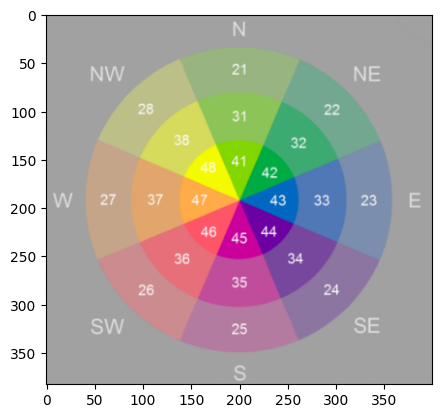

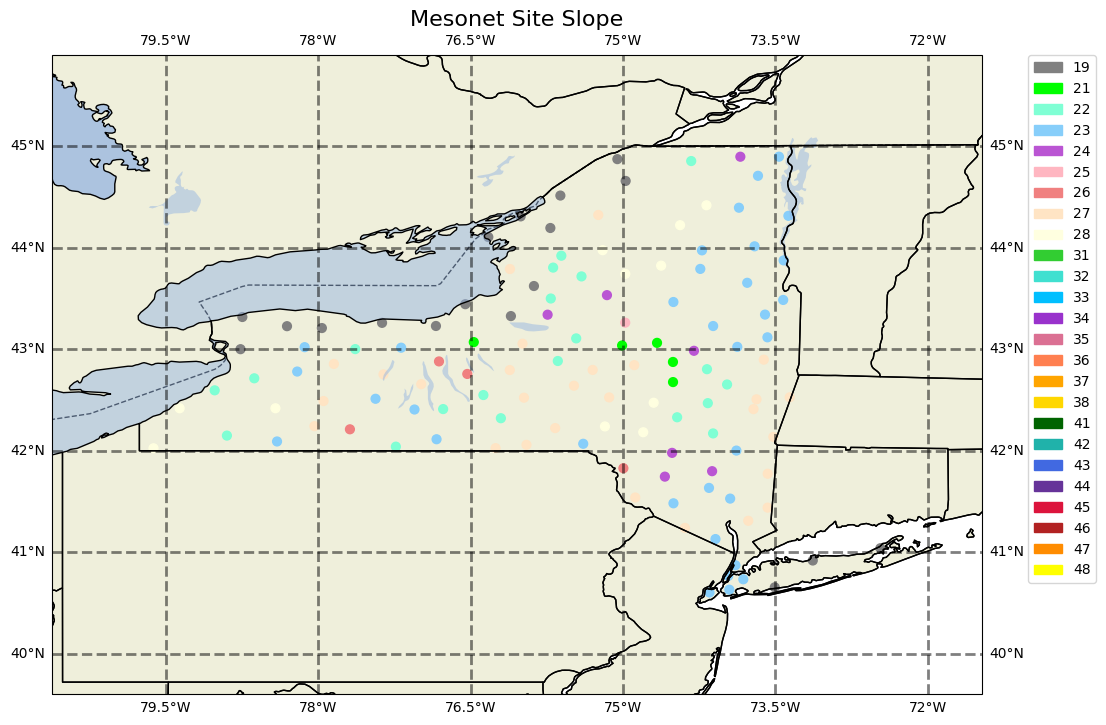

In [37]:
plurality_plot(mode_df_ny)

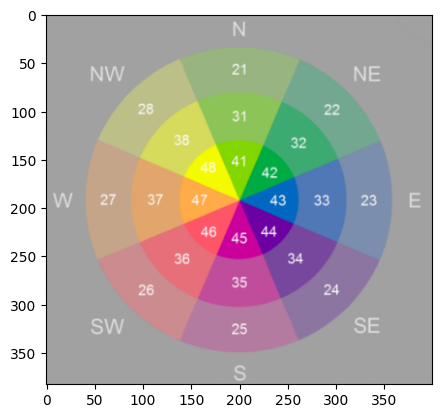

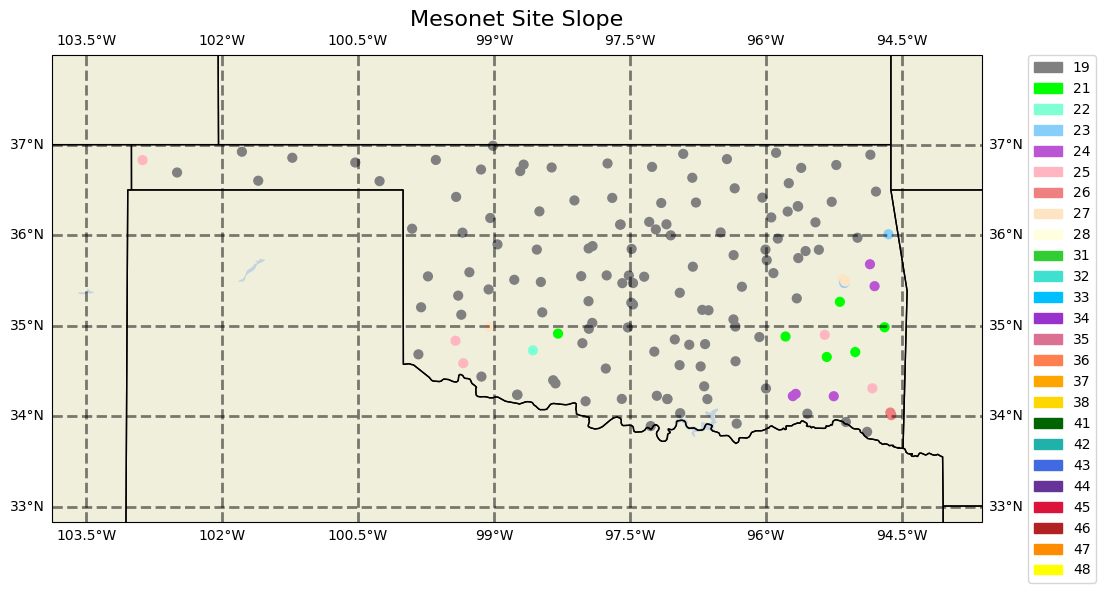

In [38]:
plurality_plot(mode_df_ok)


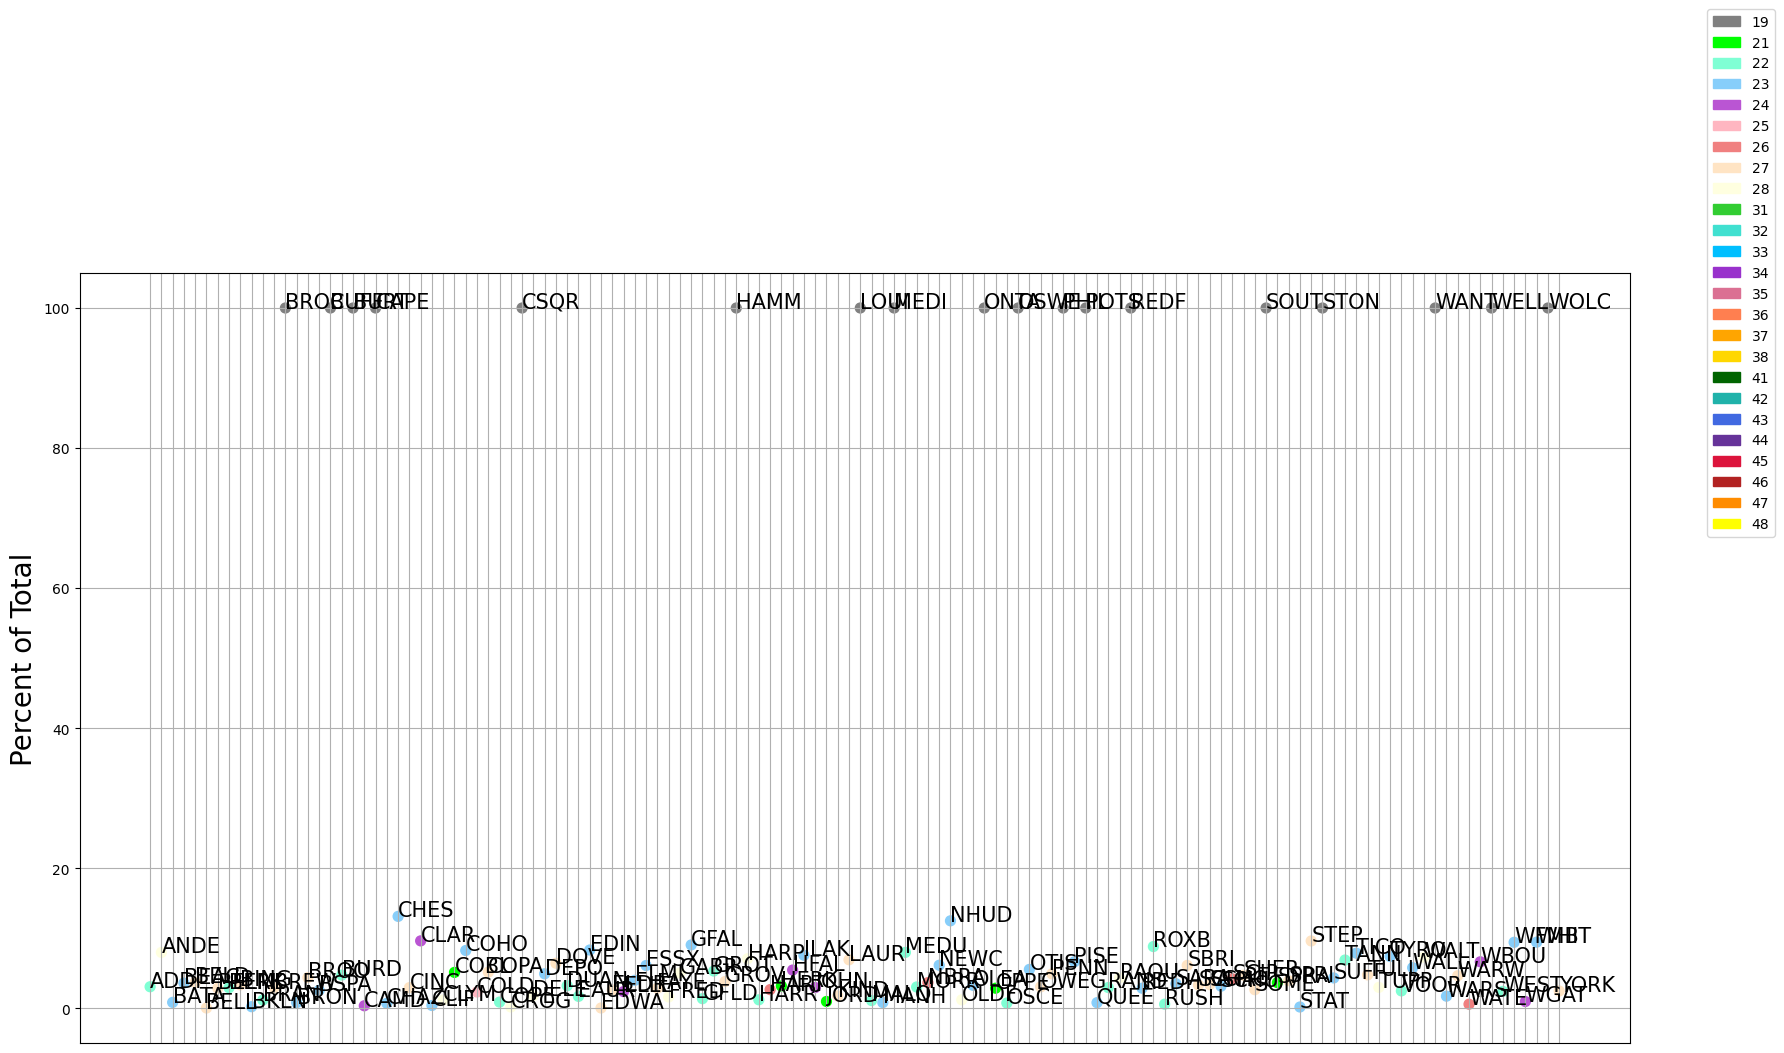

In [39]:
percent_plot(mode_df_ny)

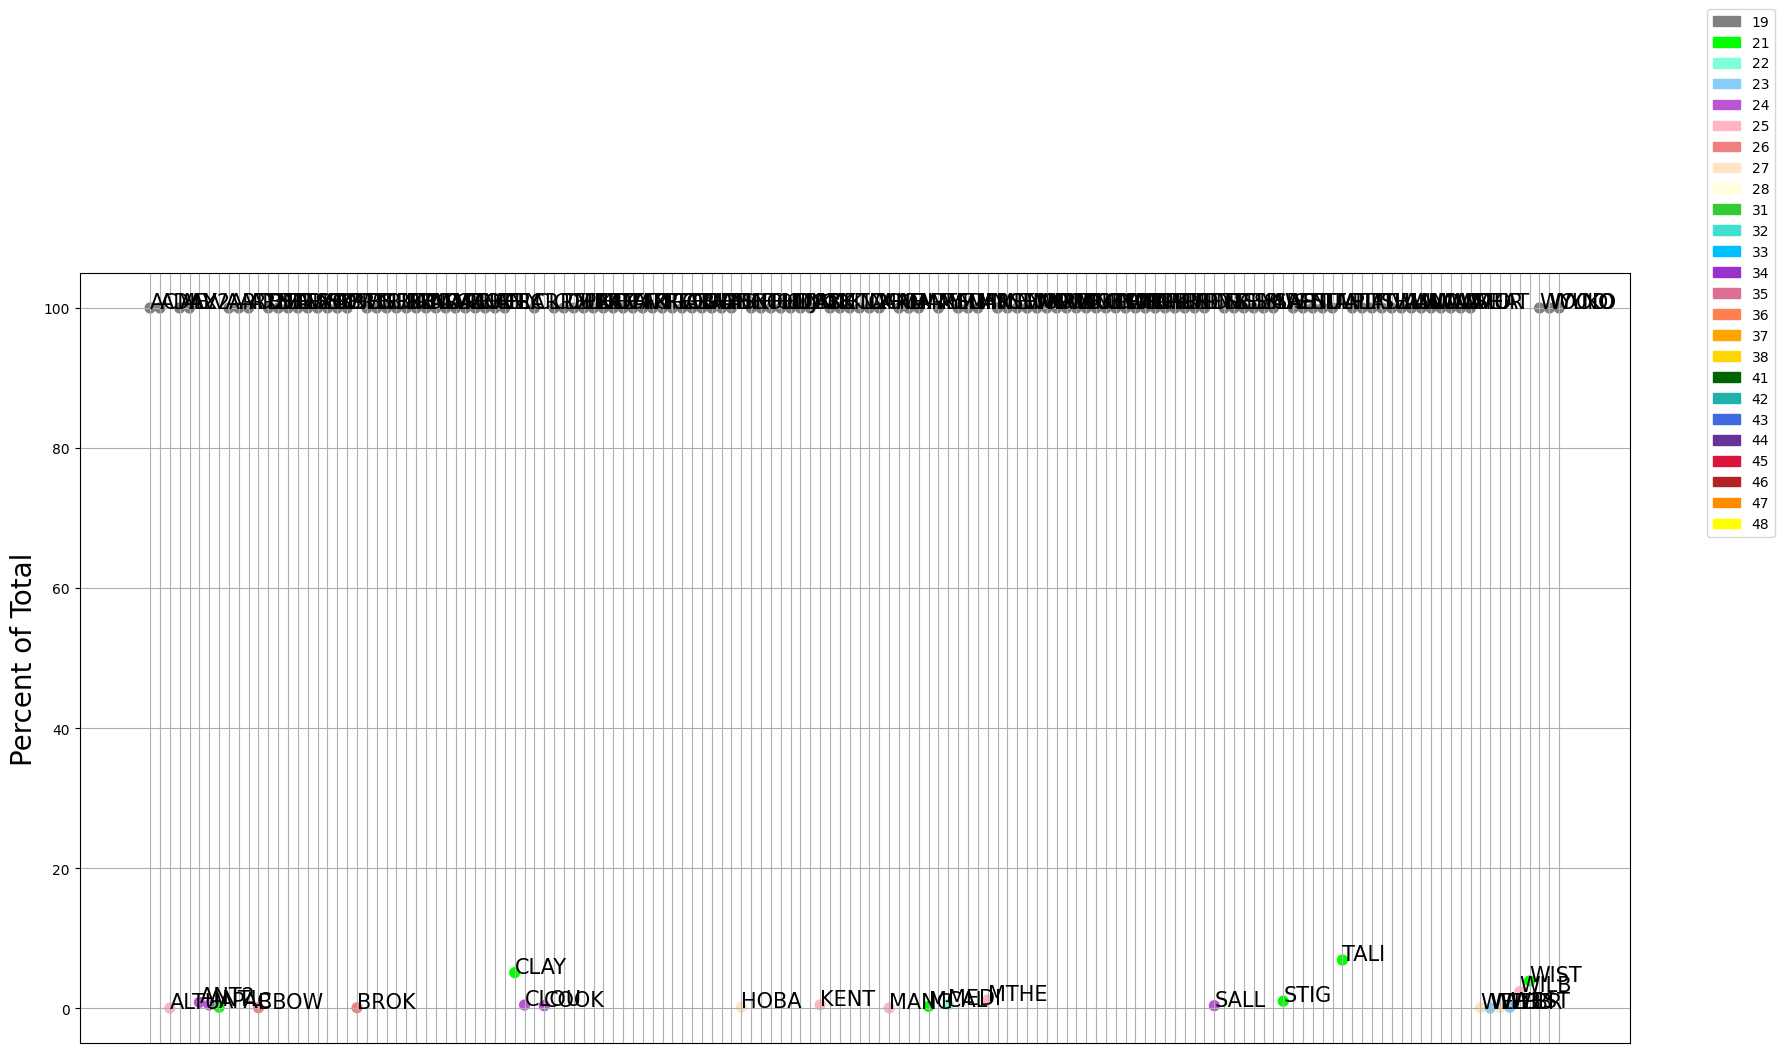

In [40]:
percent_plot(mode_df_ok)